In [4]:
import numpy as np
import matplotlib.pyplot as plt
import json
import math

In [5]:
GUNN = "Gunn"
FLESCH = "Fletch"
KEY = "Key"

In [6]:
def file_to_dict(filename):
    with open(filename, 'r') as f:
        for line in f:
            yield json.loads(line)

In [13]:
filename = "../data/readability_askreddit.dat"
subs = list(file_to_dict(filename))

In [14]:
flesch = np.array([sub[FLESCH] for sub in subs if not np.math.isnan(sub[FLESCH])], dtype=float)
gunn = np.array([sub[GUNN] for sub in subs if not np.math.isnan(sub[GUNN])], dtype=float)

In [16]:
mini = np.math.floor(min(flesch.min(), gunn.min()))
maxi = np.math.ceil(max(flesch.max(), gunn.max()))

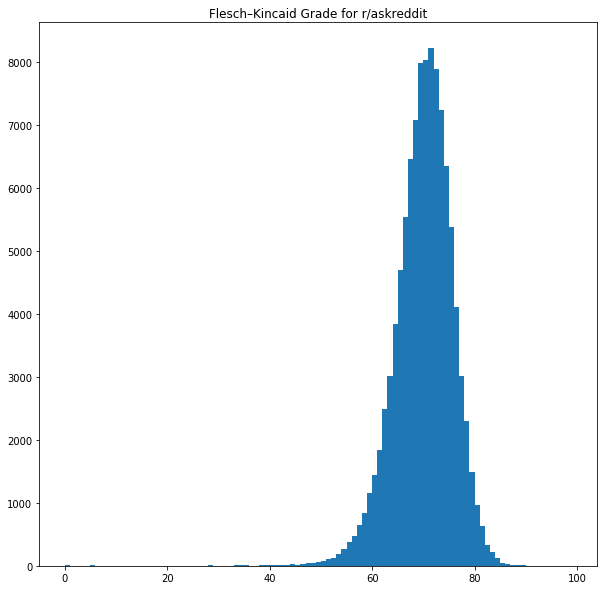

In [17]:
plt.figure(figsize=(10, 10))
plt.hist(flesch, bins=np.arange(mini, maxi))
plt.title("Flesch–Kincaid Grade for r/askreddit")
plt.show()

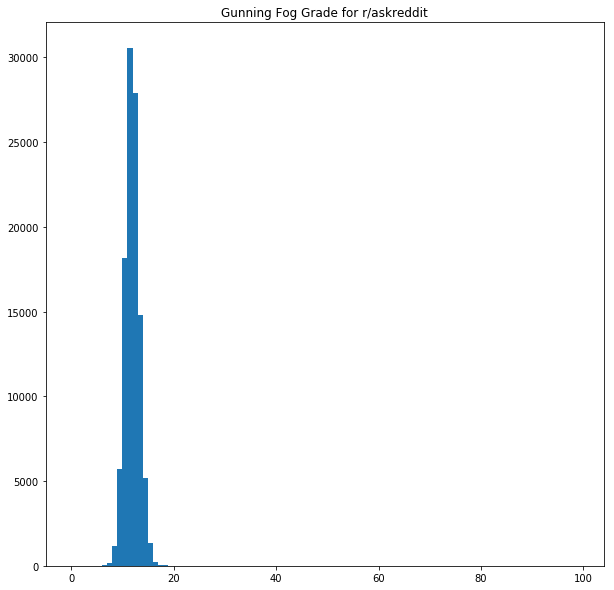

In [19]:
plt.figure(figsize=(10, 10))
plt.title("Gunning Fog Grade for r/askreddit")
plt.hist(gunn, bins=np.arange(mini, maxi))
plt.show()